In [ ]:
# Importando bibliotecas padrão
import joblib  # Para salvar e carregar modelos
import pandas as pd  # Para manipulação de dados
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para criação de gráficos
import seaborn as sns  # Para visualização de dados
import warnings  # Para controlar mensagens de aviso

# Importando módulos de machine learning da biblioteca scikit-learn
from sklearn.model_selection import train_test_split  # Para dividir o dataset em treino e teste
from sklearn.model_selection import GridSearchCV  # Para realizar busca em grid para otimização de hiperparâmetros
from sklearn.model_selection import cross_val_score  # Para avaliação cruzada
from sklearn.model_selection import KFold  # Para criar dobras para validação cruzada
from sklearn.metrics import accuracy_score  # Para calcular a acurácia dos modelos
from sklearn.tree import DecisionTreeClassifier  # Para classificação usando árvores de decisão
from sklearn.ensemble import RandomForestClassifier  # Para classificação usando florestas aleatórias
from sklearn.neighbors import KNeighborsClassifier  # Para classificação usando k-vizinhos mais próximos
from sklearn.linear_model import LogisticRegression  # Para regressão logística
from sklearn.svm import SVC  # Para máquinas de vetores de suporte
from sklearn.neural_network import MLPClassifier  # Para classificação usando redes neurais multicamadas

# Importando módulo de estatística
from scipy.stats import shapiro  # Para teste de normalidade de Shapiro-Wilk

In [16]:
# Caminho relativo a partir do diretório onde o script está localizado
df = joblib.load('../data/processed/dados_processados.pkl')

In [17]:
# Selecionando as features que mais correlacionam
entradas = df[['forma-do-caule', 'raiz-do-caule', 'odor','habitat', 'cor-do-chapéu', 'forma-do-chapéu', 'número-do-anel','cor-do-velo']]
categoria = df['classe']
print(f"Formato das tabelas de dados {entradas.shape} e características dos cogumelos {categoria.shape}")

Formato das tabelas de dados (8124, 8) e características dos cogumelos (8124,)


In [18]:
# Separamos 20% para o teste
entradas_treino, entradas_teste, categoria_treino, categoria_teste = train_test_split(entradas, categoria, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (6499, 8) e teste (1625, 8)


In [19]:
# Primeiras linhas do dataframe de entradas_treino
entradas_treino.head()

,forma-do-caule,raiz-do-caule,odor,habitat,cor-do-chapéu,forma-do-chapéu,número-do-anel,cor-do-velo
4169,0,0,4,0,3,3,1,2
5772,1,0,4,4,1,2,1,2
806,0,1,0,0,8,0,1,2
6695,1,6,4,3,0,4,1,2
5235,0,0,4,6,9,3,1,2


In [20]:
# Primeiras linhas do dataframe de categoria_treino
categoria_treino.head()

4169    2
5772    2
806     1
6695    2
5235    2
Name: classe, dtype: int64

In [21]:
# Cria o classificador KNN
k = 3
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, categoria_treino)

KNeighborsClassifier(n_neighbors=3)

In [22]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Para obter as previsões, basta chamar o método predict()
categoria_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(categoria_encontradas))

Predição: [2 1 2 ... 1 1 1]


In [23]:
# Para determinar a quantidade de acertos (acuracia)
acertos = accuracy_score(categoria_teste, categoria_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.9993846153846154


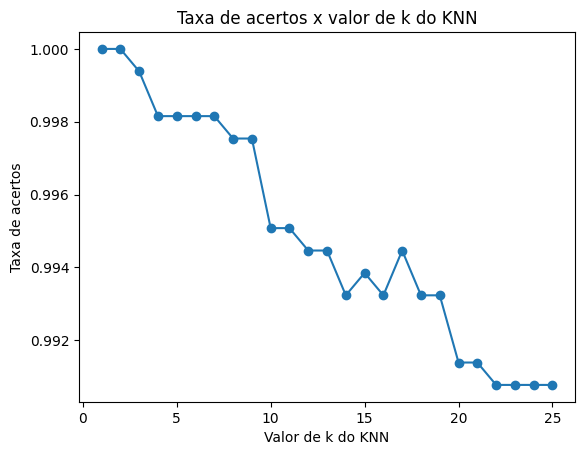

In [24]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Definir o intervalo de valores para k
k_range = list(range(1, 26))
acertos = []

# Loop para testar diferentes valores de k
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, categoria_treino)
    categoria_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(categoria_teste, categoria_encontradas))

# Plotar a taxa de acertos em função do valor de k
plt.plot(k_range, acertos, marker='o')
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


#### **Testando classificação da categoria do cogumelo, se será (COMESTÍVEL = 1) ou (VENENOSO = 2)**

### No modelo de teste inserimos os seguintes dados para análise:

Forma do Caule (0 = e): Alargando – o caule se alarga à medida que cresce.

Raiz do Caule (0 = b): Bulbosa – base do caule em formato de bulbo.

Odor (5 = m): Mofado – odor de mofo.

Habitat (4 = u): Urbano – encontrado em áreas urbanas.

Cor do Chapéu (4 = e): Verde – chapéu esverdeado.

Forma do Chapéu (0 = b): Sino – chapéu em forma de sino.

Número do Anel (0 = n): Nenhum – sem anéis no caule.





In [25]:
# Teste 1
Test = pd.DataFrame([[1, 2, 0, 3, 1, 3, 0, 3]], columns=['forma-do-caule', 'raiz-do-caule', 'odor','habitat', 'cor-do-chapéu', 'forma-do-chapéu', 'número-do-anel','cor-do-velo'])
previsao = modelo.predict(Test)
print("Previsão:", previsao)

Previsão: [1]


#### **Testando classificação da categoria do cogumelo, se será (COMESTÍVEL = 1) ou (VENENOSO = 2)**

### No modelo de teste inserimos os seguintes dados para análise:

Forma do Caule (1 = t): Afunilando – caule afunilado.

Raiz do Caule (2 = u): Copo – base do caule em formato de copo.

Odor (0 = a): Amêndoa – odor de amêndoas.

Habitat (3 = p): Trilhas – encontrado em trilhas.

Cor do Chapéu (1 = b): Creme – chapéu de cor creme.

Forma do Chapéu (3 = f): Plano – chapéu plano.

Número do Anel (0 = n): Nenhum – sem anéis no caule.

Cor do Velo (3 = y): Amarelo – velo de cor amarela.

In [26]:
# Teste 2
Test = pd.DataFrame([[0, 0, 5, 4, 4, 0, 0, 3]], columns=['forma-do-caule', 'raiz-do-caule', 'odor','habitat', 'cor-do-chapéu', 'forma-do-chapéu', 'número-do-anel','cor-do-velo'])
previsao = modelo.predict(Test)
print("Previsão:", previsao)

Previsão: [2]


### Preparação dos dados

In [28]:
# Concatena os dados de 'entradas_treino' e 'entradas_teste' ao longo do eixo 0 (verticamente), formando um único array 'x_mushroom'
x_mushroom = np.concatenate((entradas_treino, entradas_teste), axis=0)

# Exibe as dimensões do array 'x_mushroom'
x_mushroom.shape

(8124, 8)

In [29]:
x_mushroom

array([[0, 0, 4, ..., 3, 1, 2],
       [1, 0, 4, ..., 2, 1, 2],
       [0, 1, 0, ..., 0, 1, 2],
       ...,
       [1, 0, 6, ..., 3, 1, 2],
       [0, 1, 1, ..., 2, 1, 2],
       [1, 3, 6, ..., 3, 1, 2]])

In [30]:
# Concatena os dados de 'categoria_treino' e 'categoria_teste' ao longo do eixo 0 (verticamente), formando um único array 'y_mushroom'
y_mushroom = np.concatenate((categoria_treino, categoria_teste), axis=0)

# Exibe as dimensões do array 'y_mushroom'
y_mushroom.shape

(8124,)

In [31]:
y_mushroom

array([2, 2, 1, ..., 1, 1, 1])

### Árvore de Decisão

In [32]:
parametros = {  # Dicionário contendo a grade de hiperparâmetros para busca
    'criterion': ['gini', 'entropy'],  # Critério para medir a qualidade da divisão (Gini ou Entropy)
    'splitter': ['best', 'random'],  # Estratégia para escolher a divisão em cada nó (Melhor ou Aleatória)
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 5, 10]  # Número mínimo de amostras necessárias para estar em um nó folha
}


In [33]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)  # Cria o GridSearchCV com DecisionTreeClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
1.0


c:\Users\jonat\mushroom-detection\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Random Forest

In [34]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'criterion': ['gini', 'entropy'],  # Define a métrica para medir a qualidade das divisões (gini ou entropy)
    'n_estimators': [10, 40, 100, 150],  # Número de árvores na floresta do RandomForestClassifier
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 5, 10]  # Número mínimo de amostras que um nó folha deve ter
}


In [35]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)  # Cria o GridSearchCV com RandomForestClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)


{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
1.0


c:\Users\jonat\mushroom-detection\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### KNN

In [36]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'n_neighbors': [3, 5, 10, 20],  # Número de vizinhos a serem usados pelo algoritmo K-Nearest Neighbors (KNN)
    'p': [1, 2]  # Parâmetro da métrica de distância: 1 para Manhattan (L1), 2 para Euclidiana (L2)
}

In [37]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)  # Cria o GridSearchCV com KNeighborsClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'n_neighbors': 3, 'p': 1}
1.0


### Regressão Logística

In [38]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'tol': [0.0001, 0.00001, 0.000001],  # Tolerância para o critério de parada. Valores menores significam convergência mais precisa
    'C': [1.0, 1.5, 2.0],  # Parâmetro de regularização. Valores menores especificam uma regularização mais forte
    'solver': ['lbfgs', 'sag', 'saga']  # Algoritmo de otimização a ser usado na resolução do problema de ajuste do modelo
}

In [39]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)  # Cria o GridSearchCV com LogisticRegression como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

c:\Users\jonat\mushroom-detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jonat\mushroom-detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.8764160666919288


### SVM

In [40]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'tol': [0.001, 0.0001, 0.00001],  # Tolerância para o critério de parada. Valores menores significam convergência mais precisa
    'C': [1.0, 1.5, 2.0],  # Parâmetro de regularização. Valores menores especificam uma regularização mais forte
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Tipo de função kernel a ser usada pelo SVM
}

In [41]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)  # Cria o GridSearchCV com SVC como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.9954459264873059


### Redes Neurais

In [42]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'activation': ['relu', 'logistic', 'tanh'],  # Função de ativação a ser usada nas camadas ocultas ('relu', 'logistic', 'tanh')
    'solver': ['adam', 'sgd'],  # Algoritmo para otimização do modelo ('adam', 'sgd')
    'batch_size': [10, 56]  # Tamanho do lote para atualização dos gradientes
}

In [43]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)  # Cria o GridSearchCV com MLPClassifier e a grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, realizando a busca exaustiva de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca

c:\Users\jonat\mushroom-detection\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jonat\mushroom-detection\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jonat\mushroom-detection\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jonat\mushroom-detection\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jonat\m

In [44]:
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
1.0


### Validação Cruzada

In [45]:
# Inicialização de listas para armazenar os resultados das avaliações dos modelos
resultados_arvore = []  # Lista para armazenar os resultados da Árvore de Decisão
resultados_random_forest = []  # Lista para armazenar os resultados do Random Forest
resultados_knn = []  # Lista para armazenar os resultados do KNN
resultados_logistica = []  # Lista para armazenar os resultados da Regressão Logística
resultados_svm = []  # Lista para armazenar os resultados do SVM
resultados_rede_neural = []  # Lista para armazenar os resultados da Rede Neural

# Loop para realizar a validação cruzada 30 vezes com diferentes seeds
for i in range(30):
    print(i)  # Imprime o número da iteração atual

    # Criação do KFold com 10 divisões, embaralhando os dados e utilizando uma seed diferente a cada iteração
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)  # Cria uma instância do KFold para a validação cruzada

    # Avaliação da Árvore de Decisão
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')  # Define o modelo de Árvore de Decisão com hiperparâmetros especificados
    scores = cross_val_score(arvore, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_arvore.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do Random Forest
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)  # Define o modelo Random Forest com hiperparâmetros especificados
    scores = cross_val_score(random_forest, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_random_forest.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do KNN
    knn = KNeighborsClassifier()  # Define o modelo KNN com parâmetros padrão
    scores = cross_val_score(knn, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_knn.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação da Regressão Logística
    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)  # Define o modelo de Regressão Logística com hiperparâmetros especificados
    scores = cross_val_score(logistica, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_logistica.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do SVM
    svm = SVC(kernel='rbf', C=2.0)  # Define o modelo SVM com hiperparâmetros especificados
    scores = cross_val_score(svm, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_svm.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação da Rede Neural
    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')  # Define o modelo de Rede Neural com hiperparâmetros especificados
    scores = cross_val_score(rede_neural, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_rede_neural.append(scores.mean())  # Calcula e armazena a média das acurácias


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [46]:
# Criação de um DataFrame com os resultados das validações cruzadas
resultados = pd.DataFrame({
    'Arvore': resultados_arvore,  # Coluna com os resultados da Árvore de Decisão
    'Random forest': resultados_random_forest,  # Coluna com os resultados do Random Forest
    'KNN': resultados_knn,  # Coluna com os resultados do KNN
    'Logistica': resultados_logistica,  # Coluna com os resultados da Regressão Logística
    'SVM': resultados_svm,  # Coluna com os resultados do SVM
    'Rede neural': resultados_rede_neural  # Coluna com os resultados da Rede Neural
})

# Exibição do DataFrame contendo os resultados
resultados  # Exibe o DataFrame na saída, mostrando a média das acurácias para cada modelo em cada iteração

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,1.000000,1.000000,0.999139,0.876414,0.996308,1.000000
1,1.000000,1.000000,0.999754,0.876414,0.996431,1.000000
2,1.000000,1.000000,0.999261,0.876420,0.995692,0.999754
3,1.000000,1.000000,0.999754,0.876410,0.996431,0.999877
4,1.000000,1.000000,0.999262,0.876414,0.995322,1.000000
5,1.000000,1.000000,0.999508,0.876417,0.995691,1.000000
6,1.000000,0.999754,0.999384,0.876414,0.995816,0.999754
7,1.000000,1.000000,0.999261,0.876418,0.995815,1.000000
8,1.000000,1.000000,0.999261,0.876412,0.995690,1.000000
9,1.000000,1.000000,0.999754,0.876412,0.995938,1.000000


In [47]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.999992,0.999979,0.999508,0.876415,0.995934,0.999918
std,0.000045,0.000065,0.000250,0.000002,0.000358,0.000149
min,0.999754,0.999754,0.998893,0.876410,0.994954,0.999384
25%,1.000000,1.000000,0.999292,0.876413,0.995722,0.999877
50%,1.000000,1.000000,0.999508,0.876414,0.995877,1.000000
75%,1.000000,1.000000,0.999754,0.876417,0.996184,1.000000
max,1.000000,1.000000,0.999754,0.876420,0.996554,1.000000


In [48]:
# Calcula e exibe a variância dos resultados das validações cruzadas para cada modelo
# Baixa variância indica desempenho consistente e previsível do modelo, com variações mínimas nas acurácias entre as iterações.
# Alta variância sugere sensibilidade a pequenas mudanças nos dados ou hiperparâmetros, levando a um desempenho menos estável e mais variável durante as iterações da validação cruzada.
resultados.var()

Arvore           2.022212e-09
Random forest    4.265265e-09
KNN              6.268116e-08
Logistica        5.393733e-12
SVM              1.281091e-07
Rede neural      2.229435e-08
dtype: float64

In [49]:
# Calcula e exibe o Coeficiente de Variação (CV) dos resultados das validações cruzadas para cada modelo, em percentual
(resultados.std() / resultados.mean()) * 100

Arvore           0.004497
Random forest    0.006531
KNN              0.025049
Logistica        0.000265
SVM              0.035938
Rede neural      0.014933
dtype: float64

### Teste de normalidade nos resultados

In [51]:
# Valor p > 0.05: os dados são normais.
# Valor p ≤ 0.05: os dados não são normais.
alpha = 0.05

In [69]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=np.float64(0.17961525210206075), pvalue=np.float64(7.76637667465555e-12)),
 ShapiroResult(statistic=np.float64(0.3474902435060929), pvalue=np.float64(1.811796093694497e-10)),
 ShapiroResult(statistic=np.float64(0.8563998284104277), pvalue=np.float64(0.0008466320910519288)),
 ShapiroResult(statistic=np.float64(0.9787848547170753), pvalue=np.float64(0.7924012549112065)),
 ShapiroResult(statistic=np.float64(0.958850344933263), pvalue=np.float64(0.2894201121063298)),
 ShapiroResult(statistic=np.float64(0.6185507001677004), pvalue=np.float64(1.2387973556964002e-07)))

### Análise dos Resultados dos Testes de Shapiro-Wilk:

- ShapiroResult(statistic=np.float64(0.1796), pvalue=np.float64(7.77e-12)): Dados muito não normais.
- ShapiroResult(statistic=np.float64(0.3475), pvalue=np.float64(1.81e-10)): Dados muito não normais.
- ShapiroResult(statistic=np.float64(0.8564), pvalue=np.float64(0.00085)): Dados muito não normais.
- ShapiroResult(statistic=np.float64(0.9788), pvalue=np.float64(0.7924)): Dados próximos à normalidade.
- ShapiroResult(statistic=np.float64(0.9589), pvalue=np.float64(0.2894)): Dados que podem ser normais.
- ShapiroResult(statistic=np.float64(0.6186), pvalue=np.float64(1.24e-07)): Dados muito não normais.

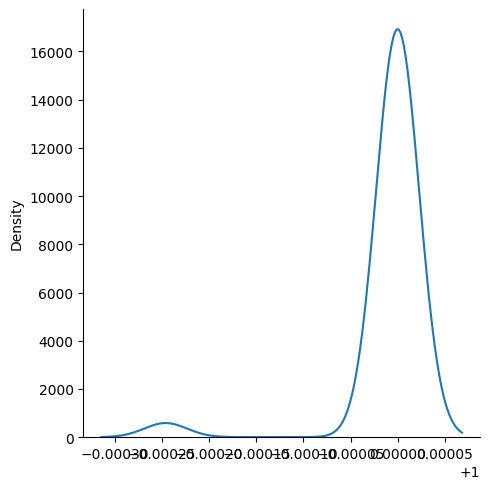

In [82]:
sns.displot(resultados_arvore, kind='kde')


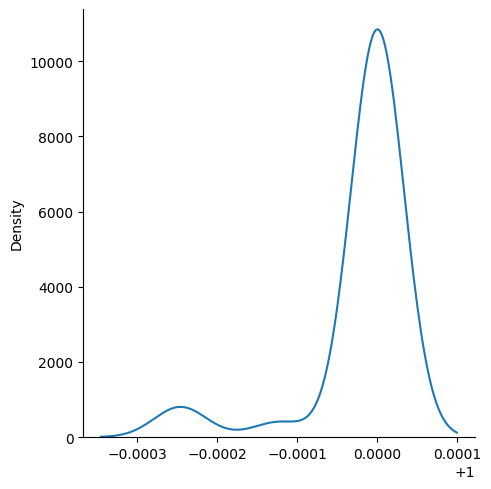

In [84]:
sns.displot(resultados_random_forest, kind= 'kde')

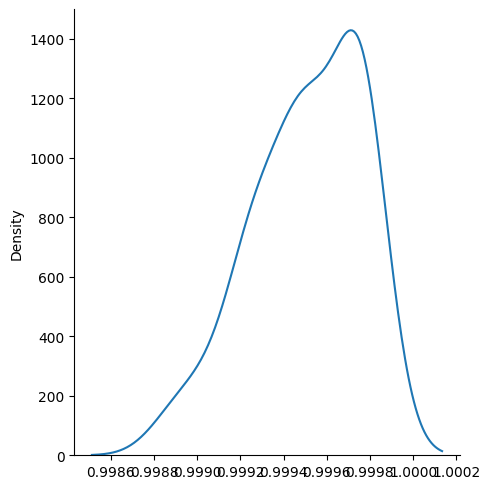

In [64]:
sns.displot(resultados_knn, kind= 'kde')

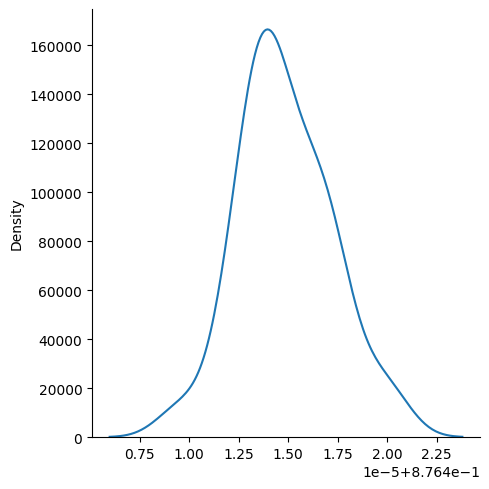

In [65]:
sns.displot(resultados_logistica, kind= 'kde')

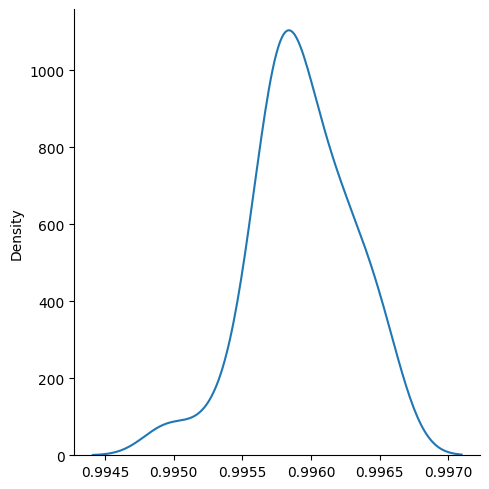

In [66]:
sns.displot(resultados_svm, kind= 'kde')

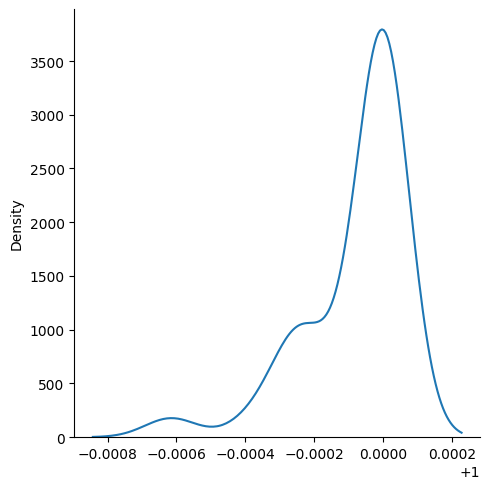

In [67]:
sns.displot(resultados_rede_neural, kind= 'kde')